In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('phase-4.csv')
df['total_burned'] = df['perc_burned'] + df['perc_preburned']
print(df)

       density  wind_speed  direction strategy  ignition_location  \
0           50           0          1  Nothing                  1   
1           50           0          1  Nothing                  1   
2           50           0          1  Nothing                  1   
3           50           0          1  Nothing                  1   
4           50           0          1  Nothing                  1   
...        ...         ...        ...      ...                ...   
44995       90          23          8     Wall                  4   
44996       90          23          8     Wall                  4   
44997       90          23          8     Wall                  4   
44998       90          23          8     Wall                  4   
44999       90          23          8     Wall                  4   

       perc_burned  perc_preburned  village_damaged  seed  total_burned  
0            86.25            0.00             True     0         86.25  
1            87.55     

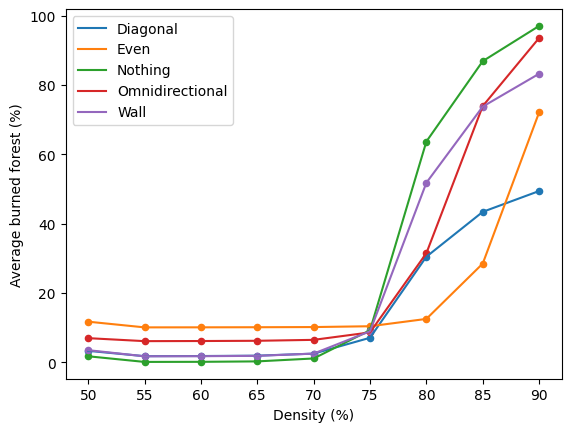

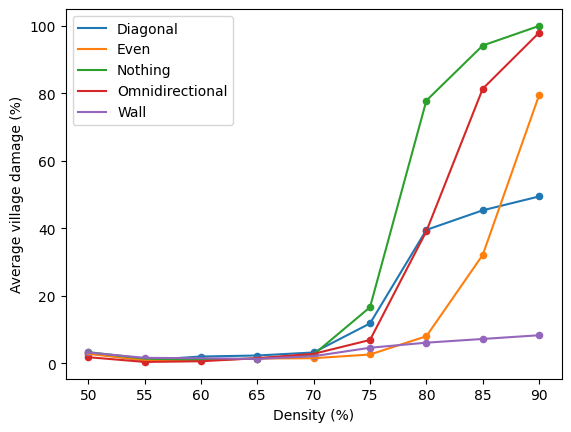

In [76]:
#RQ1: een grafiek met op x-as density, 5 lijnen, en op y-as de total_burned
per_strategy = df.groupby(['strategy'])
for name, group in per_strategy:
    per_density = group.groupby('density')
    x = [n for n,g in per_density]

    plt.figure(1)
    y = [g['total_burned'].mean() for n,g in per_density]
    plt.plot(x,y,label=name)
    plt.scatter(x,y, s = 20)

    plt.figure(2)
    y = [g['village_damaged'].mean() * 100 for n,g in per_density]
    plt.plot(x,y,label=name)
    plt.scatter(x,y, s = 20)

plt.figure(1)
plt.xlabel('Density (%)')
plt.ylabel('Average burned forest (%)')
plt.legend()

plt.figure(2)
plt.xlabel('Density (%)')
plt.ylabel('Average village damage (%)')
plt.legend()

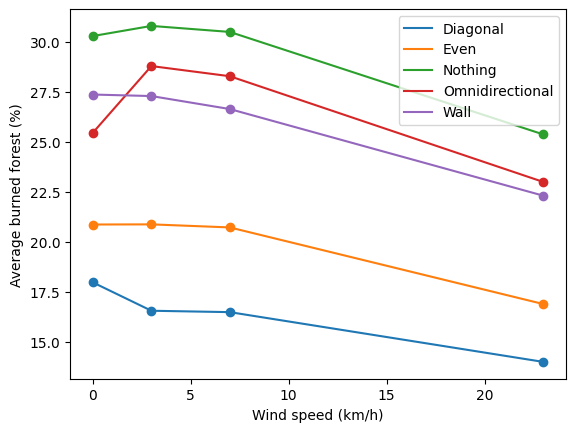

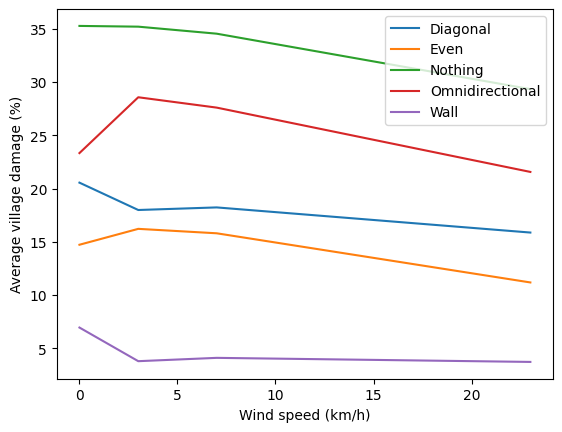

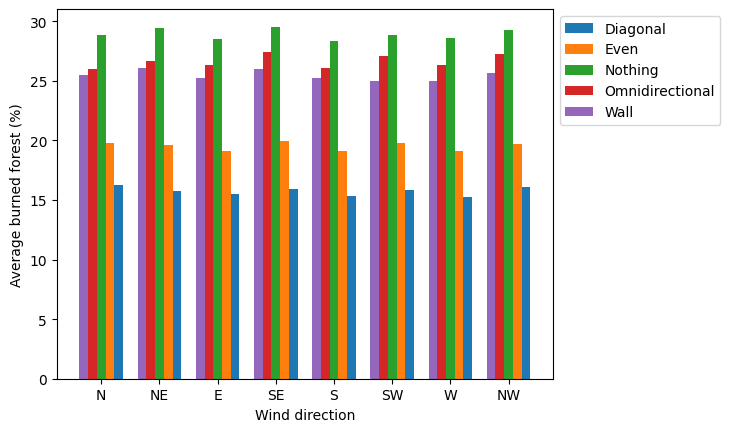

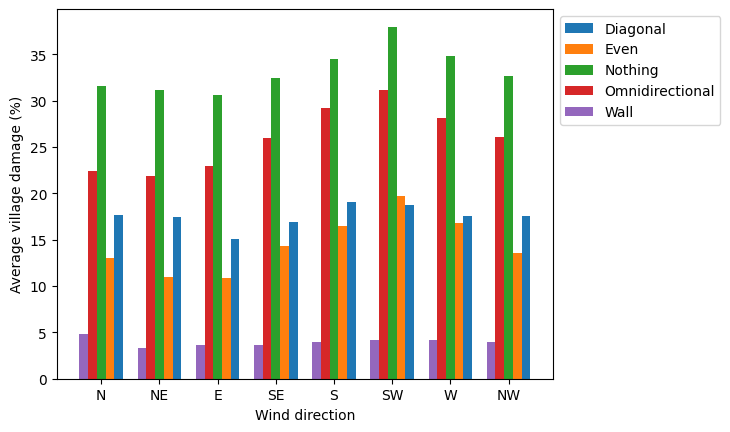

In [148]:
#RQ2
per_strategy = df.groupby(['strategy'])
strategies = [str(n) for n,g in per_strategy]
x = np.arange(8)  # X locations
width = 0.15  # Width of bars
s = 1
direction_names = ['N','NE', 'E', 'SE','S','SW','W','NW']

for name, group in per_strategy:
    per_wind_speed = group.groupby('wind_speed')
    per_wind_direction = group.groupby('direction')
    sx = [n for n,g in per_wind_speed]
    dx = [str(n) for n,g in per_wind_direction]
    plt.figure(1)
    y = [g['total_burned'].mean() for n,g in per_wind_speed]
    plt.plot(sx,y,label=name)
    plt.scatter(sx,y)

    plt.figure(2)
    y = [g['village_damaged'].mean() * 100 for n,g in per_wind_speed]
    plt.plot(sx,y,label=name)

    plt.figure(3)
    y = [g['total_burned'].mean() for n,g in per_wind_direction]
    plt.bar(x - ((s-3) * width), y, width, label=name[0])

    plt.figure(4)
    y = [g['village_damaged'].mean() * 100 for n,g in per_wind_direction]
    plt.bar(x - ((s-3) * width), y, width, label=name[0])

    s += 1

plt.figure(1)
plt.legend()
plt.xlabel("Wind speed (km/h)")
plt.ylabel('Average burned forest (%)')

plt.figure(2)
plt.legend(loc='upper right')
plt.xlabel("Wind speed (km/h)")
plt.ylabel('Average village damage (%)')

plt.figure(3)
plt.legend(bbox_to_anchor=(1,1))
plt.xticks(x, direction_names)
plt.xlabel("Wind direction")
plt.ylabel('Average burned forest (%)')

plt.figure(4)
plt.legend(bbox_to_anchor=(1,1))
plt.xticks(x, direction_names)
plt.xlabel("Wind direction")
plt.ylabel('Average village damage (%)')
plt.show()

TypeError: unsupported operand type(s) for -: 'list' and 'float'

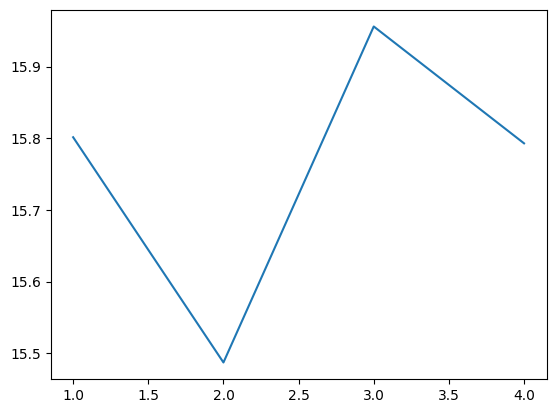

<Figure size 640x480 with 0 Axes>

In [149]:
#RQ3: een grafiek met op x-as ignition location, 5 lijnen, en op y-as de total_burned
per_strategy = df.groupby(['strategy'])
for name, group in per_strategy:
    per_ignition_location = group.groupby('ignition_location')
    x = [n for n,g in per_ignition_location]

    plt.figure(1)
    y = [g['total_burned'].mean() for n,g in per_ignition_location]
    plt.plot(x,y,label=name)
#Werkt niet
    plt.figure(2)
    y = [g['village_damaged'].mean() * 100 for n,g in per_ignition_location]
    plt.bar(x - ((s-3) * width), y, width, label=name[0])

plt.figure(1)
plt.title('% total burned forest given ignition location')
plt.xlabel('Ignition location')
plt.ylabel('Average % burned')
plt.ylim(0,30)
plt.legend()

plt.figure(2)
plt.title('% village damage given ignition location')
plt.xlabel('Ignition location')
plt.ylabel('% village damaged')
plt.ylim(0,30)
plt.legend()

In [20]:
scores = df.groupby('strategy')['total_burned'].mean()
print(scores)
winning_strategy = scores.idxmin()
print(f'Winner forest saved: {winning_strategy}')
print()
scores = df.groupby('strategy')['village_damaged'].mean()
print(scores)
winning_strategy = scores.idxmin()
print(f'Winner village saved: {winning_strategy}')

strategy
Diagonal           15.759270
Even               19.536086
Nothing            28.926472
Omnidirectional    26.622131
Wall               25.475018
Name: total_burned, dtype: float64
Winner forest saved: Diagonal

strategy
Diagonal           0.174889
Even               0.144111
Nothing            0.331222
Omnidirectional    0.258111
Wall               0.039889
Name: village_damaged, dtype: float64
Winner village saved: Wall
